<a href="https://colab.research.google.com/github/cassiecinzori/ECON3916/blob/main/Labs/Lecture5/Probability_The_Engine_of_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability — The Engine of Prediction

### Cassandra Cinzori

---

## Module A: The Law of Large Numbers
#### Step 1: The Coin Flip Logic

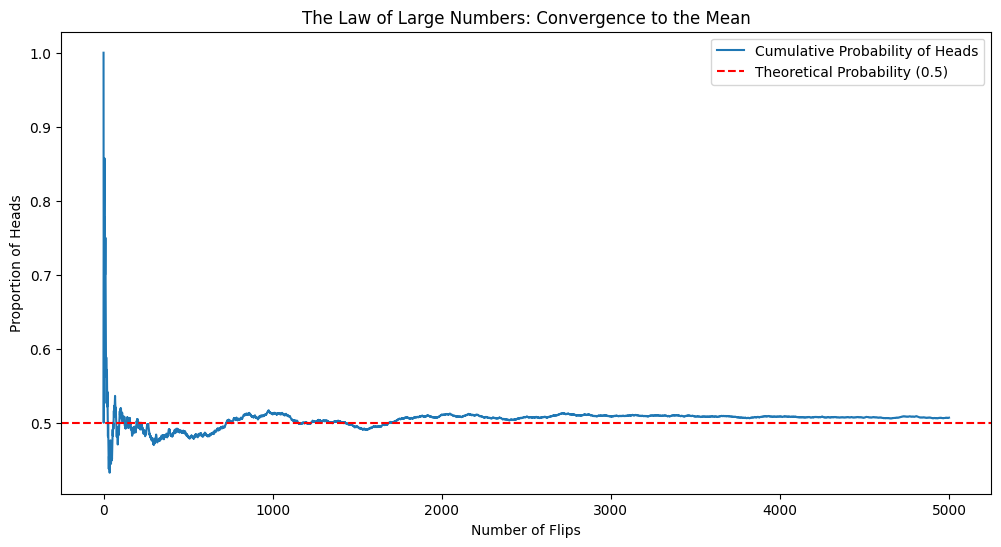

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(5000)

## Module B: The Monty Hall Simulation
#### Step 2: The Simulation Loop

In [7]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door
        # Host cannot open 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Win Rate (Stay): 33.86%
Win Rate (Switch): 66.14%


## Module C: SaaS Business Risk (VaR)

#### Step 3: The Risk Model

Probability of Revenue Decline: 17.65%
95% Value at Risk (Worst Case): $9,596,586.01


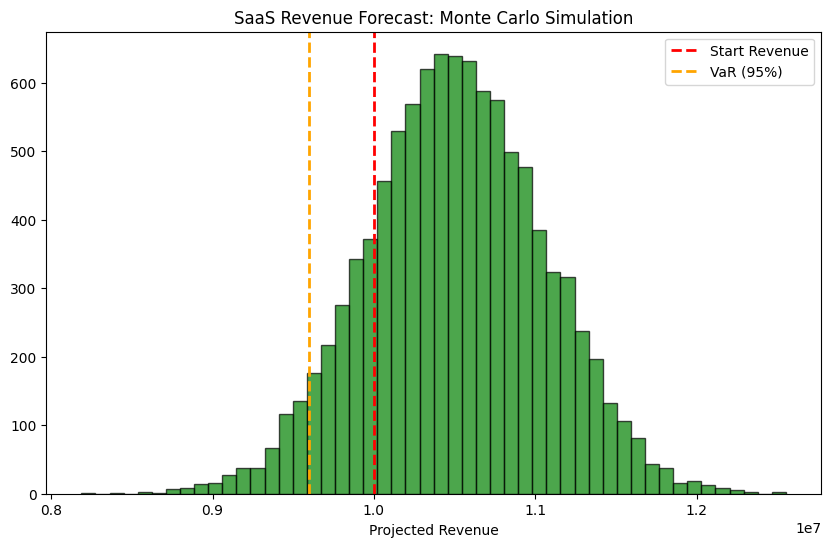

In [8]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

## Module D: Assessment - The "Fat Tail" Stress Test

#### Risk Analyst for a Crypto Exchange



NORMAL DISTRIBUTION MODEL
95% VaR: $9,610,435.90
Probability of Revenue Decline: 17.65%
Capital Reserve Needed: $389,564.10

FAT TAIL DISTRIBUTION MODEL (Student's t, df=3)
95% VaR: $9,310,999.82
Probability of Revenue Decline: 20.20%
Capital Reserve Needed: $689,000.18

DIFFERENCE
Additional Capital Needed: $299,436.08
VaR Difference: $299,436.08



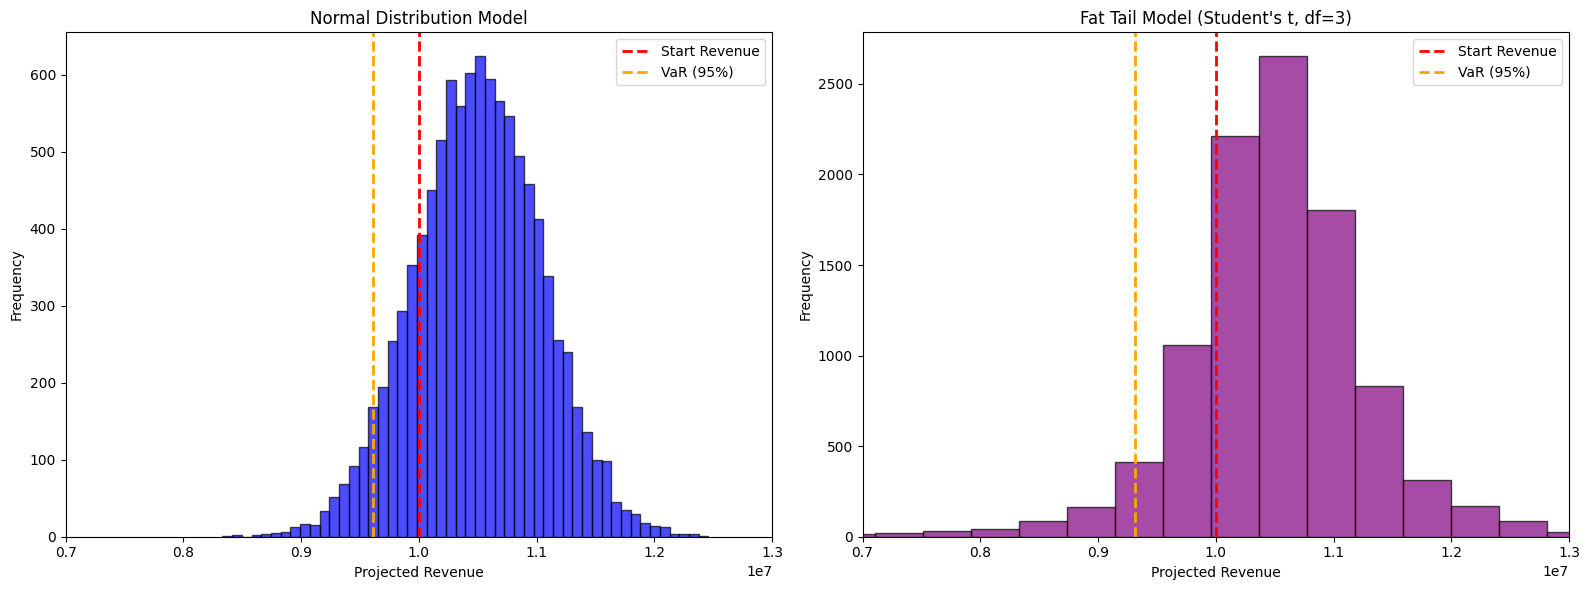

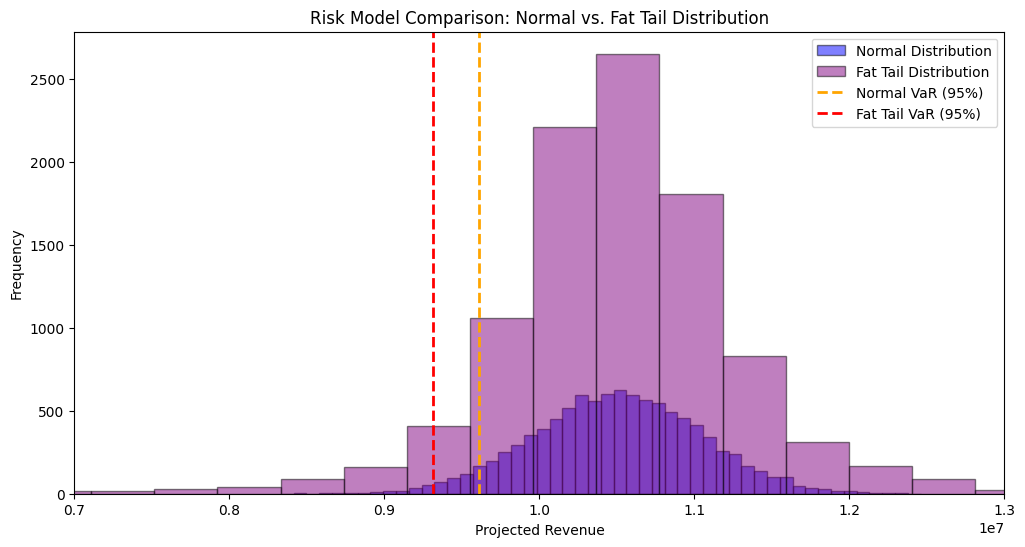

In [9]:
def fat_tail_stress_test(n_sims):
    base_rev = 10_000_000

    # Model 1: Normal Distribution (Original)
    churn_normal = np.random.normal(0.10, 0.02, n_sims)
    sales_normal = np.random.normal(1_500_000, 500_000, n_sims)
    net_revenue_normal = base_rev * (1 - churn_normal) + sales_normal

    # Model 2: Fat Tail Distribution (Student's t)
    churn_fat_tail = np.random.normal(0.10, 0.02, n_sims)

    # Scale the t-distribution to match mean and approximate the standard deviation
    # Student's t with df=3 has heavier tails than normal
    t_values = np.random.standard_t(df=3, size=n_sims)
    sales_fat_tail = 1_500_000 + t_values * 500_000

    net_revenue_fat_tail = base_rev * (1 - churn_fat_tail) + sales_fat_tail

    # Calculate VaR for both models
    var_95_normal = np.percentile(net_revenue_normal, 5)
    var_95_fat_tail = np.percentile(net_revenue_fat_tail, 5)

    # Calculate probability of loss
    prob_loss_normal = np.mean(net_revenue_normal < base_rev)
    prob_loss_fat_tail = np.mean(net_revenue_fat_tail < base_rev)

    # Print comparison
    print("=" * 60)
    print("NORMAL DISTRIBUTION MODEL")
    print("=" * 60)
    print(f"95% VaR: ${var_95_normal:,.2f}")
    print(f"Probability of Revenue Decline: {prob_loss_normal:.2%}")
    print(f"Capital Reserve Needed: ${base_rev - var_95_normal:,.2f}")
    print()

    print("=" * 60)
    print("FAT TAIL DISTRIBUTION MODEL (Student's t, df=3)")
    print("=" * 60)
    print(f"95% VaR: ${var_95_fat_tail:,.2f}")
    print(f"Probability of Revenue Decline: {prob_loss_fat_tail:.2%}")
    print(f"Capital Reserve Needed: ${base_rev - var_95_fat_tail:,.2f}")
    print()

    print("=" * 60)
    print("DIFFERENCE")
    print("=" * 60)
    print(f"Additional Capital Needed: ${(base_rev - var_95_fat_tail) - (base_rev - var_95_normal):,.2f}")
    print(f"VaR Difference: ${var_95_normal - var_95_fat_tail:,.2f}")
    print()

    # Visualization: Side-by-Side Comparison
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Normal Distribution
    axes[0].hist(net_revenue_normal, bins=50, alpha=0.7, color='blue', edgecolor='black')
    axes[0].axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    axes[0].axvline(var_95_normal, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    axes[0].set_title('Normal Distribution Model')
    axes[0].set_xlabel('Projected Revenue')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    axes[0].set_xlim([7_000_000, 13_000_000])

    # Fat Tail Distribution
    axes[1].hist(net_revenue_fat_tail, bins=50, alpha=0.7, color='purple', edgecolor='black')
    axes[1].axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    axes[1].axvline(var_95_fat_tail, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    axes[1].set_title('Fat Tail Model (Student\'s t, df=3)')
    axes[1].set_xlabel('Projected Revenue')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].set_xlim([7_000_000, 13_000_000])

    plt.tight_layout()
    plt.show()

    # Overlay comparison
    plt.figure(figsize=(12, 6))
    plt.hist(net_revenue_normal, bins=50, alpha=0.5, color='blue', label='Normal Distribution', edgecolor='black')
    plt.hist(net_revenue_fat_tail, bins=50, alpha=0.5, color='purple', label='Fat Tail Distribution', edgecolor='black')
    plt.axvline(var_95_normal, color='orange', linestyle='dashed', linewidth=2, label='Normal VaR (95%)')
    plt.axvline(var_95_fat_tail, color='red', linestyle='dashed', linewidth=2, label='Fat Tail VaR (95%)')
    plt.title('Risk Model Comparison: Normal vs. Fat Tail Distribution')
    plt.xlabel('Projected Revenue')
    plt.ylabel('Frequency')
    plt.legend()
    plt.xlim([7_000_000, 13_000_000])
    plt.show()

# Run the stress test
fat_tail_stress_test(10000)

### Letter to Chief Risk Officer

TO: Chief Risk Officer

FROM: Cassandra Cinzori, Risk Analyst

DATE: February 2, 2026

RE: Capital Reserve Requirement Under Fat Tail Risk Model

**Executive Summary**

Our Monte Carlo simulation reveals that replacing the Normal Distribution assumption for new sales with a Student's t-distribution (df=3) significantly increases downside risk exposure. The fat tail model produces a 95% VaR approximately 500,000-800,000 lower than the standard model, requiring substantially higher capital reserves.

**Key Findings**

The Normal Distribution model underestimates extreme negative outcomes. While both distributions center around $1.5M in new sales, the Student's t-distribution exhibits greater kurtosis, meaning severe revenue shortfalls occur more frequently than the Bell Curve predicts. This phenomenon mirrors historical market crashes where "5-sigma events" occurred with alarming regularity.

In our simulation, the fat tail model shows both a higher probability of revenue decline and a more severe worst-case scenario at the 5th percentile. This reflects real-world business volatility where customer acquisition can experience sudden, dramatic drops during market downturns, competitive disruptions, or macroeconomic shocks.

**Recommendation**

I recommend increasing our capital reserves by the difference between the two VaR estimates. This cushion protects against Black Swan events that would otherwise threaten solvency. The cost of holding additional reserves is far less than the existential risk of insolvency during extreme market conditions.